## Bayesian Bandit
---
**Elo notes**

### Beta distribution

The beta distribution is a family of continuous probability distributions defined on the interval [0, 1] parametrized by two positive shape parameters, denoted by $\alpha$ and $\beta$, that appear as exponents of the __random variable__ and control the shape of the distribution.

The probability density function (pdf) of the beta distribution, for 0 ≤ x ≤ 1, and shape parameters α, β > 0, is a power function of the variable x and of its reflection (1 − x) as follows:


$
\begin{align}
f(x;\alpha,\beta) & =  \frac{1}{B(\alpha,\beta)} x^{\alpha-1}(1-x)^{\beta-1}
\end{align}
$

The beta function, __B__, is a normalization constant to ensure that the total probability integrates to 1. In the above equations x is a realization—an observed value that actually occurred—of a random process X.

The domain of the beta distribution can be viewed as a probability, and in fact the beta distribution is often used to describe the distribution of a probability value p:

${\displaystyle P(p;\alpha ,\beta )={\frac {p^{\alpha -1}(1-p)^{\beta -1}}{\mathrm {B} (\alpha ,\beta )}}}$

Examples of beta distributions used as prior probabilities to represent ignorance of prior parameter values in Bayesian inference are Beta(1,1), Beta(0,0) and Beta(1/2,1/2).

### Bayesian A/B Testing

It’s far easier to interpret the results. For example, you can easily compute the probability that version B is better than version A. In contrast, a frequentist test does not allow this even as a possibility.

Important note: The p-value is NOT the probability that either A is larger than B or B is larger than A. A P-Value is the likelihood of a seemingly unlikely event happening in a world governed only by chance.


You can alter your test material in the middle of the test. If you believe your test is not going anywhere, you can use your current posteriors as new priors for what is essentially the start of a new test without any major interruptions in your development flow. This means a bayesian approach is extremely useful to anyone involved in either Agile Development or Agile Marketing, since the testing schedule can be made to work with your development lifecycle.

We start with some prior belief about the distribution of p_A. We often will assume that all possible values of p_A are equally likely (the uniform distribution), but let's work more generally and assume it's a beta distribution with shape parameters a and b. Recall this is also the beta distribution with 

$\alpha$ = $\beta$ = 1. This is the prior.

After collecting some data, we can update our prior to get a new distribution for p_A. The likelihood is the probability that we observed the data we observed. In our case, we are repeating a Bernoulli trial with probability p_A N times and got n successes (since out of N views, we had n clicks). This is a binomial distribution.

The new distribution is called the posterior.

### Multi-Arm Bandit

Probability matching strategies reflect the idea that the number of pulls for a given lever should match its actual probability of being the optimal lever. Probability matching strategies are also known as Thompson sampling or Bayesian Bandits, and are surprisingly easy to implement if you can sample from the posterior for the mean value of each alternative.

Probability matching strategies also admit solutions to so-called contextual bandit problems.

In artificial intelligence, Thompson sampling or [Bayesian Bandit](https://en.wikipedia.org/wiki/Thompson_sampling), is a heuristic for choosing actions that addresses the exploration-exploitation dilemma in the multi-armed bandit problem. It consists in choosing the action that maximizes the expected reward with respect to a randomly drawn belief.

If you're running an A/B test and it looks like version A is doing better than version B, you are basically wasting potential by showing users version B. But if you're not confident yet, you're in a quandary.

The Multi-Arm Bandit is a way of algorithmically deciding what percent of traffic to send to each version of the site, so that you can still get statistically significant results, but show what is likely to be the better version to a higher percent of users.

We call trying out each site to gather data exploration and showing the site that we believe to be the best exploitation. Our goal is to minimize the regret, the amount of time you showed a suboptimal site.

The term Multi-Arm Bandit comes from slot machines, as one-armed bandit is another term for a slot machine. Common terminology is to call each version of the site a bandit (or a lever). __Multi-Arm Bandit is actually a class of algorithms__, and Let's explore a few in:

__06_Multi_arm_bandit.ipynb__



In [62]:
from __future__ import division

import numpy as np
import pandas as pd

import scipy.stats as scis
from math import sqrt

import matplotlib.cm as cm
import matplotlib.pyplot as plt

import itertools
import numpy.ma as masked

% matplotlib inline

import seaborn as sea

The 0 refers to a visit without a conversion 

The 1 refers to a visit with a conversion


In [78]:
siteA = np.loadtxt('siteA.txt')
siteB = np.loadtxt('siteB.txt')

In [74]:
x = np.arange(0, 1.001, 0.001)
beta_p = scis.beta.pdf(x, a=1, b=1) 
# beta_p with alpha = 1 and beta=1 is as a uniform distribution
uniform_p = scis.uniform.pdf(x)

In [69]:
def plot_prior_distribution(x, y, label):
    pdf_line = plt.plot(x, y, label=label)
    plt.fill_between(x, 0, y, alpha=.3, color=pdf_line[0].get_c())
    plt.legend()

(0, 2)

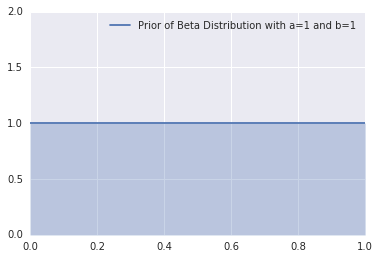

In [73]:
plot_prior_distribution(x, beta_p, 'Prior of Beta Distribution with a=1 and b=1')
plt.ylim((0, 2))

(0, 2)

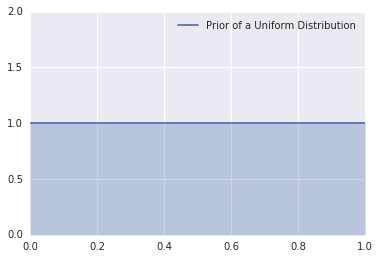

In [76]:
plot_prior_distribution(x, uniform_p, 'Prior of a Uniform Distribution')
plt.ylim((0,2))

#### Let's evaluate our Beta distribution with some data after a set of 50 trials of Site A
```
alpha =1. + clicks
beta = 1. + (views - clicks)
```

In [89]:
def beta_distribution_parameters(data, num_trials):
    alpha = 0
    beta = 0
    data = data[0:num_trials].copy()
    num_conversions = sum(data)
    num_non_conversions = len(data) - sum(data)
    
    alpha += 1 + num_conversions
    beta += 1 + num_non_conversions
    
    return alpha, beta

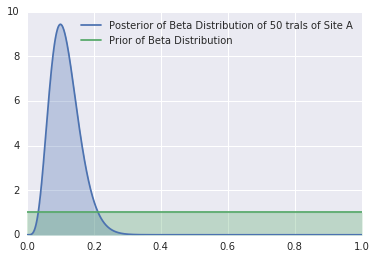

In [90]:
alpha_t, beta_t = beta_distribution_parameters(siteA, 50)
# Beta probability after a set of 50 trials
beta_p_t = scis.beta.pdf(x, alpha_t, beta_t)

plot_prior_distribution(x, beta_p_t, 'Posterior of Beta Distribution of 50 trals of Site A')
plot_prior_distribution(x, beta_p, 'Prior of Beta Distribution')

In [91]:
def plot_beta_distributions(data, trials):
    x = np.arange(0, 1.01, 0.01)
    for num_views in trials:
        alpha, beta = beta_distribution_parameters(data, num_views)
        y = scis.beta.pdf(x, alpha, beta)
        plot_prior_distribution(x, y, 'Posterior Distributio of Site A after {} views'.format(str(num_views)))
        

In [99]:
trials_set[:-1]

[0, 50, 100, 200, 400]

(0.0, 0.3)

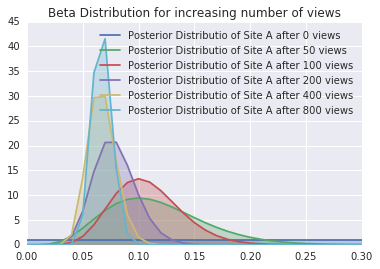

In [105]:
# Trial set : Number of views per trial
trials_set = [0, 50, 100, 200, 400, len(siteA)]

plot_beta_distributions(siteA, trials_set)
plt.title('Beta Distribution for increasing number of views');
plt.xlim(right=.3)

In [102]:
def prior_distributions(x_vals, views, clicks, label):
    beta_p = stats.beta.pdf(x_vals, a=1. + clicks, b = 1. + (views - clicks))
    plt.plot(x_vals, beta_p, label = label)
    plt.legend()

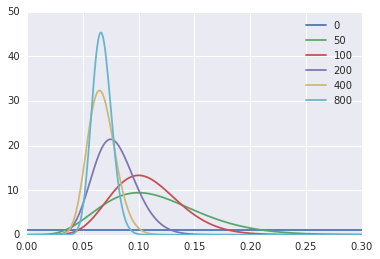

In [104]:
plt.colors

for trial in (0, 50, 100, 200, 400, 800):
    prior_distributions(x, views=len(a[:trial]), clicks=sum(a[:trial]), label=str(trial))

_ = plt.xlim(right=.3)

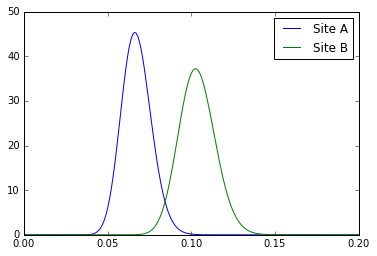

In [46]:
for data, label in zip((a, b), ('Site A', 'Site B')):
    prior_distributions(x, views=len(data), clicks=sum(data), label=label)
_ = plt.xlim(right=.2)

### Simulating Trials

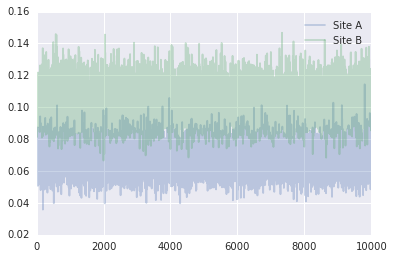

In [108]:
sample_size = 10000

# Obtain the Prior distribution for Site A and B

a_prior = stats.beta(a= 1 + sum(a), b= 1 + (len(a) - sum(a)))
b_prior = stats.beta(a= 1 + sum(b), b= 1 + (len(b) - sum(b)))

# Obtain random variables from Site A and B distributions

a_rvs = a_prior.rvs(size= sample_size)
b_rvs = b_prior.rvs(size= sample_size)

# Visualizing the random variables

_ = plt.plot(a_rvs, alpha=.3, label= 'Site A')
_ = plt.plot(b_rvs, alpha=.3, label= 'Site B')
_ = plt.legend()


In [52]:
p_b = np.sum(b_rvs > a_rvs) / sample_size

In [ ]:
print 'The probability that site B is better than site A is:', p_b
